# מבוא ל-DFT

In [3]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt


נזכיר את המשוואות המרכזיות שלנו:

$$x_{n}=\frac{1}{N}\sum_{k=0}^{N-1}\tilde{X}_{k}e^{i\frac{2\pi n}{N}k}\leftrightarrows\tilde{X}_{k}=\sum_{n=0}^{N-1}x_{n}e^{-i\frac{2\pi k}{N}n}$$

נשכח להמשך הדיון מהנרמול של $\frac{1}{N}$ למרות שלפעמים הוא חשוב

בנוסף למען הנוחות נסמן את שורש היחידה מסדר $N$ בתור $\omega=e^{-i\frac{2\pi}{N}}$

אפשר לראות כי זה פשוט מכפלה של וקטור במטריצה. נוכל להגדיר מטריצה:

$$D_{kn}=e^{-i\frac{2\pi k}{N}n}=\omega^{kn}\Rightarrow\tilde{X}_{k}=\sum_{n=0}^{N-1}D_{kn}x_{n}$$

המטריצה $D$ היא בגודל של $D\in\mathbb{C}_{N\times N}$ וכמובן מרוכבת.

נשים לב לכמה תכונות מיוחדות:
1. המטריצה סימטרית כלומר $D=D^{T}$
2. המטריצה יוניטרית (צריך להוסף נירמול). כלומר: $DD^{\dagger}=N\cdot I_{N\times N}$

ניתן דוגמא לאיך נראית $D_{4}\in\mathbb{C}_{4\times4}$

$$D_{4}=\begin{pmatrix}\omega^{0} & \omega^{0} & \omega^{0} & \omega^{0}\\
\omega^{0} & \omega^{1} & \omega^{2} & \omega^{3}\\
\omega^{0} & \omega^{2} & \omega^{4} & \omega^{6}\\
\omega^{0} & \omega^{3} & \omega^{6} & \omega^{9}
\end{pmatrix}=\begin{pmatrix}1 & 1 & 1 & 1\\
1 & -i & -1 & i\\
1 & -1 & 1 & -1\\
1 & i & -1 & -i
\end{pmatrix}$$

עכשיו כשיש לנו בראש את זה שפורייה זה הכפלה במטריצה יוניטרית. נוכל לשאול את עצמנו איזה וקטורים אנחנו יכולים להכפיל במטריצה הזו ולקבל וקטור שכולו אפסים חוץ ממקום אחד. טוב כמובן מההגדרות אלו בדיוק העמודות של המטריצה. ואכן נבדוק:

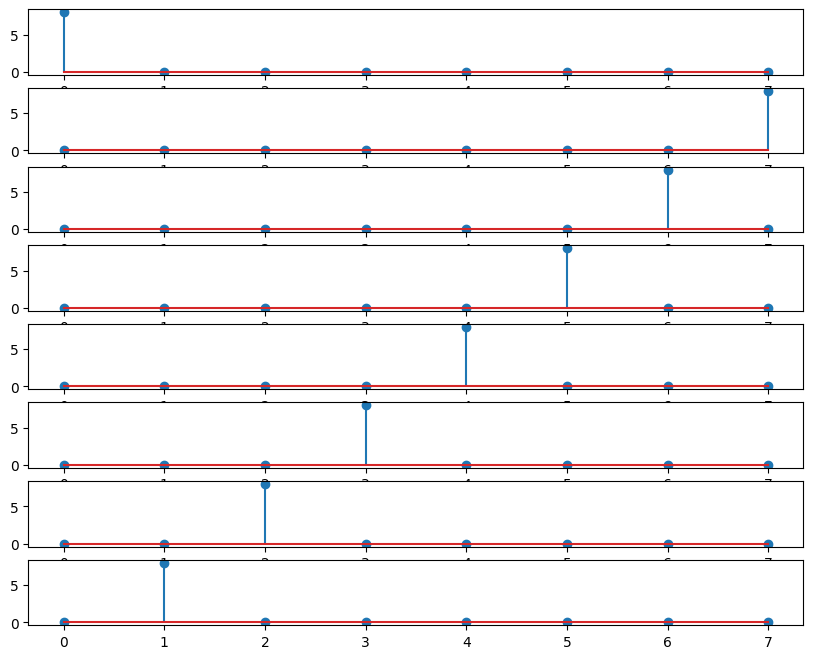

In [15]:
N = 8
root_n = np.exp(-2j*np.pi/N)

D = np.array([[root_n**(k*n) for n in range(N)] for k in range(N)])

fig,axes = plt.subplots(N,1,figsize=(10,8))
# iterate over rows and calculate the dft (fft)
for i, D_k in enumerate(D):
    D_k_f = fft.fft(D_k)
    axes[i].stem(range(N),np.abs(D_k_f))
plt.show()
    


נשים לב שהעמודות הן בדיוק מה שהיינו מגדירים "תדר טהור" ומה שמיוחד בו הוא מסיים כמות סיבובים שלמה על הקטע.

מה התדר הכי גבוה? השורה האמצעית שהיא פשוט
$\begin{pmatrix}1\\
-1\\
1\\
-1\\
\vdots\\
-1
\end{pmatrix}$
נשים לב שזה התדר הכי גבוה רק אם $N$ מספר זוגי. אחרת לא בדיוק מוגדר תדר הכי גבוה. כי יש לנו שתי שורות שהן "התדר הכי גבוה"

לדוגמא עבור $N=5$ יש את העמודה שעושה קפיצות של $\frac{2}{5}$ מעגל כל פעם ויש את העמודה שעושה $\frac{3}{5}$ מעגל כל פעם.

כבר כאן אנחנו מתחילים לראות שיש חשיבות לקשר בין הדגימה הראשונה והאחרונה. מה יקרה אם ניקח תדר שגורם לכך שהגל שלנו לא יכנס מספר פעמים שלם בקטע? נבדוק:


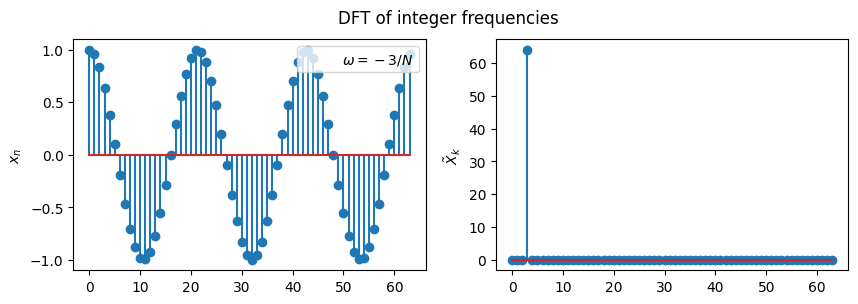

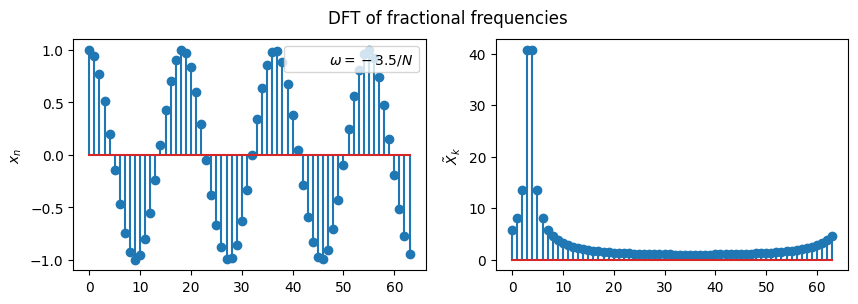

In [68]:
N = 64
w_int = -3/N
w_frac = -3.5/N
n_axis = np.arange(N)
phase_int = np.exp(-2j*np.pi*w_int*n_axis)
phase_frac = np.exp(-2j*np.pi*w_frac*n_axis)
phase_int_f = fft.fft(phase_int)
phase_frac_f = fft.fft(phase_frac)

from matplotlib.patches import Rectangle
extra = Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0)

fig,axes = plt.subplots(1,2,figsize=(10,3))
fig.suptitle('DFT of integer frequencies')
axes[0].stem(n_axis,np.real(phase_int))
axes[0].set_ylabel(r'$x_{n}$')
axes[1].stem(n_axis,np.abs(phase_int_f))
axes[1].set_ylabel(r'$\tilde{X}_{k}$')
axes[0].legend([extra],[f'$\omega={int(w_int*N)} / N$'], loc='upper right')
plt.show()

fig,axes = plt.subplots(1,2,figsize=(10,3))
fig.suptitle('DFT of fractional frequencies')
axes[0].stem(n_axis,np.real(phase_frac))
axes[0].set_ylabel(r'$x_{n}$')
axes[1].stem(n_axis,np.abs(phase_frac_f))
axes[1].set_ylabel(r'$\tilde{X}_{k}$')
axes[0].legend([extra],[f'$\omega={w_frac*N} / N$'], loc='upper right')
plt.show()